# Predictive Approaches in Machine Learning (II)
## Part 1: Neural nets
#### Prof. Dr. Oliver Junge
Department of Mathematics\
Technical University of Munich\
Germany\
\
July 9, 2022

This Julia notebook provides the code for the experiment conducted in the course. In your Julia environment, the packages `LaTeXStrings`, `ForwardDiff` and `Plots` need to be installed, e.g., by issuing the commands

In [17]:
import Pkg
Pkg.add("LaTeXStrings"); Pkg.add("ForwardDiff"); Pkg.add("Optim"); Pkg.add("Plots"); Pkg.add("Flux")

   Resolving package versions...
  No Changes to `~/Nextcloud/teaching/Data Science/lecture/codes/Project.toml`
  No Changes to `~/Nextcloud/teaching/Data Science/lecture/codes/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Nextcloud/teaching/Data Science/lecture/codes/Project.toml`
  No Changes to `~/Nextcloud/teaching/Data Science/lecture/codes/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Nextcloud/teaching/Data Science/lecture/codes/Project.toml`
  No Changes to `~/Nextcloud/teaching/Data Science/lecture/codes/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Nextcloud/teaching/Data Science/lecture/codes/Project.toml`
  No Changes to `~/Nextcloud/teaching/Data Science/lecture/codes/Manifest.toml`
   Resolving package versions...
   Installed Static ──────────── v0.7.3
   Installed PrettyPrint ─────── v0.2.0
   Installed ShowCases ───────── v0.1.0
   Installed ContextVariablesX ─ v0.1.2
   Installed Optimisers ──────── v0.2.7

In [1]:
using LinearAlgebra, ForwardDiff, LaTeXStrings, Optim, Plots
default(legend=false)
gr();

### Example: point classification

the given data consists of ten points in the plane with two different labels (⭐ and ● )

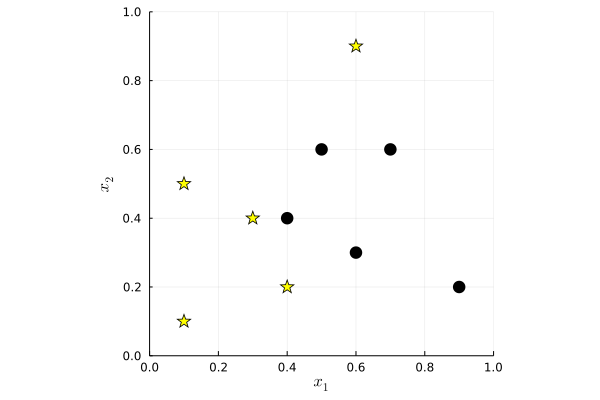

In [2]:
x = [0.1 0.3 0.1 0.6 0.4 0.6 0.5 0.9 0.4 0.7; 
     0.1 0.4 0.5 0.9 0.2 0.3 0.6 0.2 0.4 0.6] 
y = [ones(1,5) zeros(1,5)]
function plot_data(x,y)
     scatter!(x[1,1:5], x[2,1:5], m=:star, mc=:yellow, ms = 7, xlim=(0.0,1.0), ylim=(0.0,1.0))
     scatter!(x[1,6:10], x[2,6:10], m=:circle, ms = 7, mc=:black, 
        xlabel=L"x_1", ylabel=L"x_2", ratio=:equal)
end
plot(); plot_data(x,y)
# savefig("../tum/figures/data.pdf")

the step (aka 'Heaviside') function

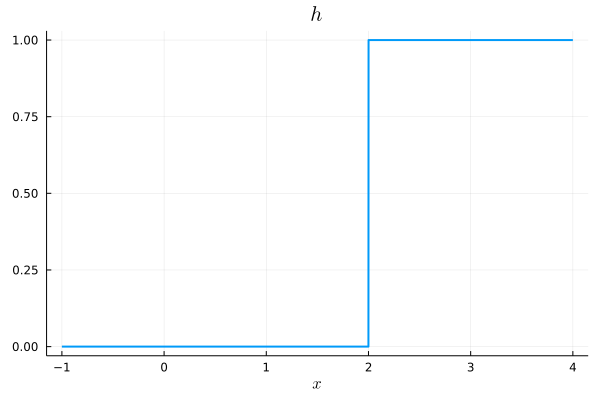

In [3]:
h(x) = x < 0 ? 0 : 1
plot(x -> h(x-2), -1, 4, lw=2, xlabel=L"x", title = L"h")
# savefig("../tum/figures/step2.pdf")

the better 'step' function: the sigmoid function

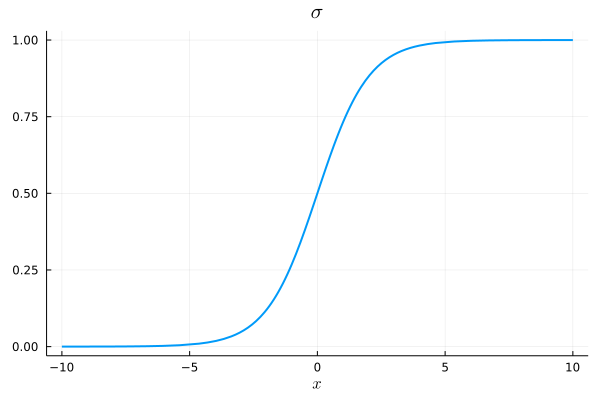

In [4]:
σ(x) = 1/(1+exp(-x))
plot(σ, -10, 10, lw=2, xlabel=L"x", title = L"\sigma")
# savefig("../tum/figures/sigmoid.pdf")

### 1st attempt: classification by $x$-coordinate

In [5]:
C(b) = 1/10*norm(y - σ.(x[1:1,:] .+ b))^2
DC(b) = ForwardDiff.derivative(C,b)

DC (generic function with 1 method)

In [6]:
function gradient_descent(∇f, x, TOL)
    while norm(∇f(x)) > TOL
        x = x - ∇f(x)
    end
    return x
end

gradient_descent (generic function with 1 method)

-0.46185855686580696

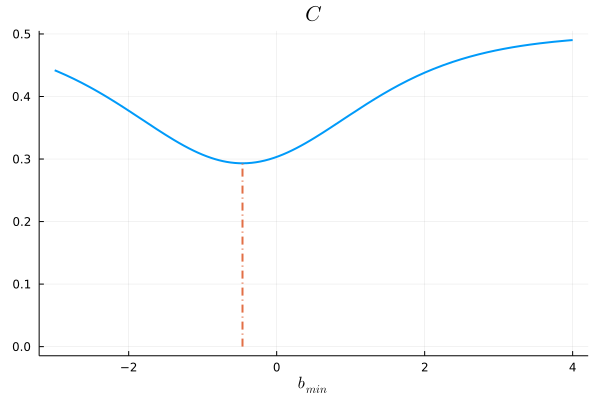

In [7]:
b_min = gradient_descent(DC, -0.5, 1e-6)
print(b_min)
plot(C, -3, 4, xlabel=L"b_{min}", lw=2, title=L"C", )
plot!([b_min, b_min], [0,C(b_min)], ls=:dashdot, lw=2)
# savefig("../tum/figures/cost1d.pdf")

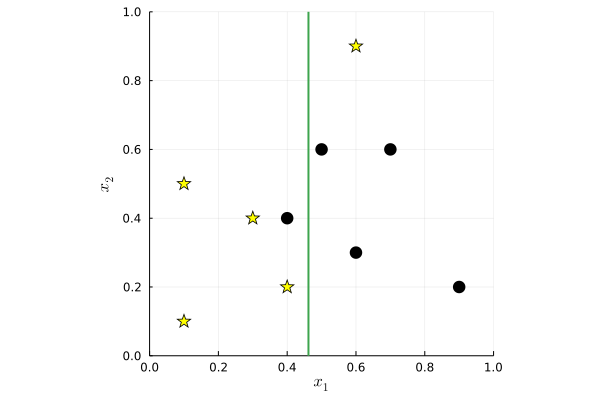

In [8]:
plot(); plot_data(x,y)
plot!([-b_min, -b_min], [0,1], lw=2)
# savefig("../tum../figures/data-result_1d.pdf")

### 2nd attempt: classification by arbitrary line in the plane

In [9]:
F(w,b) = σ.(w'*x .+ b)
C(w,b) = 1/10*norm(y .- F(w,b))^2
C(p) = C(p[1:2], p[3])
DC(p) = ForwardDiff.gradient(C,p)
p = gradient_descent(DC, rand(3), 1e-2)

3-element Vector{Float64}:
 -4.136500616379666
  0.8835698726523744
  1.478006883668243

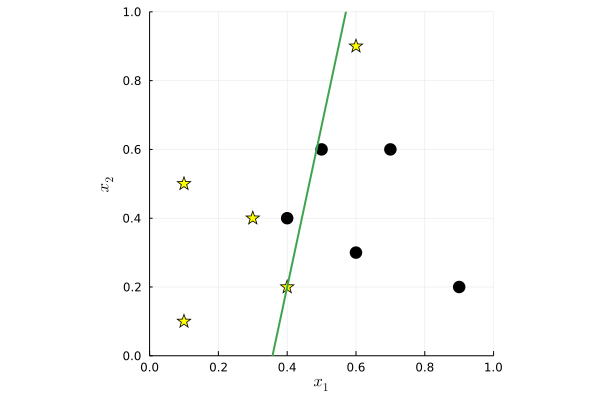

In [10]:
plot(); plot_data(x,y)
w = p[1:2]; b = p[3]
plot!([0, 1], [-b/w[2], -(b+w[1])/w[2]], lw=2)
# savefig(".../tum/figures/data-result_2d.pdf")

### 3rd attempt: classification by two lines

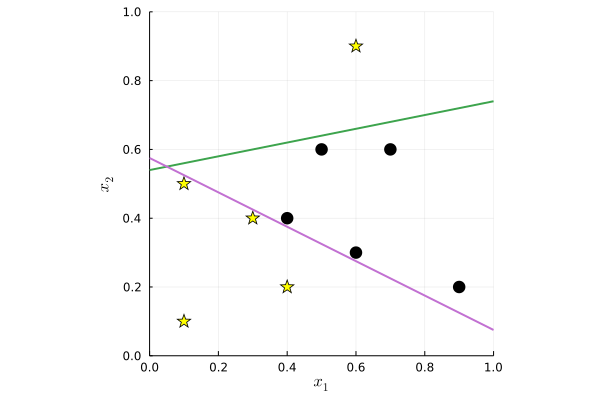

In [11]:
plot(); plot_data(x,y)
w = [-1, 5]; b = -2.7
plot!([0, 1], [-b/w[2], -(b+w[1])/w[2]], lw=2)
w = [-1, -2]; b = 1.15
plot!([0, 1], [-b/w[2], -(b+w[1])/w[2]], lw=2)
# savefig("../tum/figures/data-result_lines.pdf")

### 4th attempt: deep network with four layers

In [12]:
y = [ones(1,5) zeros(1,5); zeros(1,5) ones(1,5)]

F(W2,W3,W4,b2,b3,b4,x) = σ.(W4*σ.(W3*σ.(W2*x .+ b2) .+ b3) .+ b4)
C(W2,W3,W4,b2,b3,b4) = 1/10*norm(y .- F(W2,W3,W4,b2,b3,b4,x))^2

C(p) = C(reshape(p[1:4],2,2), reshape(p[5:10],3,2), reshape(p[11:16],2,3), 
         p[17:18], p[19:21], p[22:23])
F(p,x) = F(reshape(p[1:4],2,2), reshape(p[5:10],3,2), reshape(p[11:16],2,3), 
         p[17:18], p[19:21], p[22:23],x)

F (generic function with 2 methods)

5.2960896320036174e-9

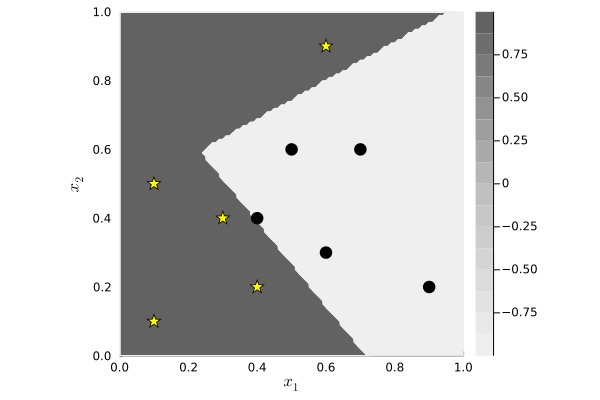

In [14]:
p0 = 20*rand(23).-10
result = optimize(C, p0, BFGS(), autodiff=:forward)
p_opt = Optim.minimizer(result)
print(C(p_opt))

H = (x,y) -> F(p_opt, [x,y])[1] - F(p_opt, [x,y])[2]
X = 0.0:0.01:1.0
Z = H.(X',X)
contourf(X,X,Z, colorbar=true, c=:Greys_3)
plot_data(x,y)
# savefig("data-result-deep.pdf")

### Activation functions

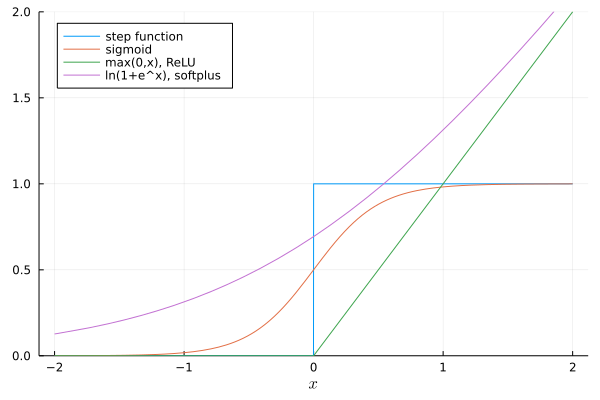

In [15]:
σ(x) = x < 0 ? 0 : 1
plot(σ, -2, 2, xlabel=L"x", legend=:topleft, label="step function", )
σ(x) = 1/(1+exp(-4x))
plot!(σ, -2, 2, label="sigmoid")
# σ(x) = tanh(x)
# plot!(σ, -2, 2, label="tanh(x)")
σ(x) = max(0.0,x)
plot!(σ, -2, 2, label="max(0,x), ReLU")
σ(x) = log(1+exp(x))
plot!(σ, -2, 2, ylim = (0,2), label="ln(1+e^x), softplus")
# savefig("tum/figures/activation-1.pdf")

# Experiment: handwriting recognition
### on the famous MNIST data set

In [132]:
Pkg.add("Flux"); Pkg.add("MLDatasets"); Pkg.add("Images"); Pkg.add("ProgressMeter");

   Resolving package versions...
  No Changes to `~/Nextcloud/teaching/Data Science/lecture/codes/Project.toml`
  No Changes to `~/Nextcloud/teaching/Data Science/lecture/codes/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Nextcloud/teaching/Data Science/lecture/codes/Project.toml`
  No Changes to `~/Nextcloud/teaching/Data Science/lecture/codes/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Nextcloud/teaching/Data Science/lecture/codes/Project.toml`
  No Changes to `~/Nextcloud/teaching/Data Science/lecture/codes/Manifest.toml`
   Resolving package versions...
    Updating `~/Nextcloud/teaching/Data Science/lecture/codes/Project.toml`
  [92933f4c] + ProgressMeter v1.7.2
  No Changes to `~/Nextcloud/teaching/Data Science/lecture/codes/Manifest.toml`


In [44]:
using Flux, MLDatasets, Images, ProgressMeter
using Flux: train!, flatten, onehotbatch, params, Losses
using CUDA

## Load training and test data (images, labels)

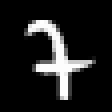

In [61]:
x, y = MNIST(split=:train)[:] # |> gpu
k = rand(1:length(y))
img = colorview(Gray, x[:,:,k]')

In [62]:
y'

1×60000 adjoint(::Vector{Int64}) with eltype Int64:
 5  0  4  1  9  2  1  3  1  4  3  5  3  …  7  8  9  2  9  5  1  8  3  5  6  8

In [63]:
y = onehotbatch(y, 0:9)

10×60000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  1  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  1  ⋅  1     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  1
 ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

## Defining the neural net, choosing the objective and the optimizer

In [64]:
nn = Chain(
    Dense(784, 64, relu),
    Dense(64, 10, relu), softmax
) # |> gpu
loss(x, y) = Losses.mse(nn(x), y)
optimizer = ADAM(0.001)

ADAM(0.001, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

## Training

In [65]:
data = [(Flux.flatten(x), Flux.flatten(y))]
@showprogress 1 for i in 1:100
    Flux.train!(loss, params(nn), data, optimizer)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:01:00


## Validating the performance on a test data set

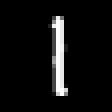

In [66]:
x_test, y_test = MNIST(split=:test)[:]
k = rand(1:length(y_test))
colorview(Gray, x_test[:,:,k]')

In [67]:
x_data = Flux.flatten(x_test) # |> gpu
nn(x_data[:, k])

10-element Vector{Float32}:
 0.0022543853
 0.96869653
 0.0022543853
 0.009890527
 0.0022543853
 0.0022543853
 0.0022543853
 0.0022543853
 0.003954762
 0.003931982

In [68]:
findmax(nn(x_data[:, k]))[2] - 1

1

In [69]:
acc = 0
for i in 1:length(y_test)
    if findmax(nn(x_data[:, i]))[2] - 1  == y_test[i]
        acc = acc + 1
    end
end
println("accuracy = ", acc / length(y_test))

accuracy = 0.7452
